In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [12]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [14]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect = True)
# reflect the tables
Base.classes.keys()


['measurement', 'station']

In [15]:
# View all of the classes that automap found


In [31]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [32]:
# Create our session (link) from Python to the DB
session =Session(engine)

# Exploratory Precipitation Analysis

In [33]:
# Find the most recent date in the data set.
Recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Most Recent Date Recorded: {Recent_date}")


Most Recent Date Recorded: ('2017-08-23',)


In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
Prior_date = dt.date(2017,8,23) - dt.timedelta(days = 365)
print(f"One Year Prior from Most Recent Date: {Prior_date}")

# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= Prior_date).all()

query

# Save the query results as a Pandas DataFrame and set the index to the date column
query_df = pd.DataFrame(query, columns = ['Date','Precipitation'])
query_df.set_index("Date", inplace = True)
query_df.sort_values(by="Date")
query_df.head()


One Year Prior from Most Recent Date: 2016-08-23


,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


Text(0, 0.5, 'Inches')

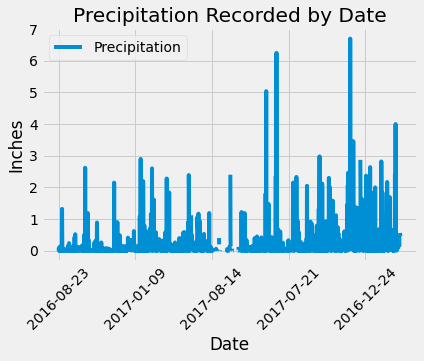

In [35]:
## Use Pandas Plotting with Matplotlib to plot the data
query_df.plot()
plt.xticks(rotation = 45)
plt.title("Precipitation Recorded by Date")
plt.ylabel("Inches")

# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number stations in the dataset
query_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [37]:
# Design a query to calculate the total number stations in the dataset
Stat_count = session.query(Station.station).count()
print(f'The Number of Stations Recorded is {Stat_count}')


The Number of Stations Recorded is 9


In [38]:

# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Most_act = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

Most_act

Act_df = pd.DataFrame(Most_act, columns = ['Station', 'Count'])
Act_df.head()

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Most_stat = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').one()
Most_stat

(54.0, 85.0, 71.66378066378067)

In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Recent_date = session.query(func.max(Measurement.date)).\
    filter(Measurement.station == 'USC00519281').first()
print(f"Most Recent Date Recorded: {Recent_date}")


Most Recent Date Recorded: ('2017-08-18',)


In [42]:
Prior_date = dt.date(2017,8,18) - dt.timedelta(days = 365)
print(f"One Year Prior from Most Recent Date: {Prior_date}")

One Year Prior from Most Recent Date: 2016-08-18


In [44]:
# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date >= Prior_date).\
    filter(Measurement.station == 'USC00519281').all()

query

# Save the query results as a Pandas DataFrame and set the index to the date column
query_df = pd.DataFrame(query, columns = ['Station','Tobs'])
query_df.set_index("Station", inplace = True)
query_df.sort_values(by="Station")
query_df.head()



,Tobs
Station,
USC00519281,80.0
USC00519281,79.0
USC00519281,81.0
USC00519281,79.0
USC00519281,78.0


Text(0.5, 1.0, 'Instances Recorded at Station USC00519281 versus Temperature')

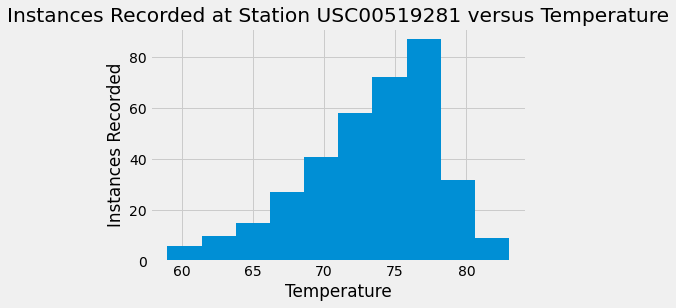

In [45]:
Graph = query_df.hist()
plt.xlabel("Temperature")
plt.ylabel("Instances Recorded")
plt.title("Instances Recorded at Station USC00519281 versus Temperature")

# Close session

In [46]:
# Close Session
session.close()